In [4]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 16 22:41:45 2021

@author: pmarc
Résolution Problème L13 - Formatif par Pierre-Marc Juneau, 17 avril 2021
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import statsmodels.api as sm
import scipy.stats as sts
# statsmodels.formula.api import ols


In [5]:


donnee = pd.read_csv('../Fichiers/DonneesBiometriquesv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)


In [6]:


"Préparation des matrices"

X=donnee
X=X.drop({'Genre'},1)
Yclass=donnee['Genre']

MatriceR=X.corr()



/tmp/ipykernel_176154/1719256903.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop({'Genre'},1)


In [7]:

"Stardardisation"

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
Xstand = scalerX.fit_transform(X.values)
Xstand=pd.DataFrame(Xstand)
Xstand.columns=X.columns


In [16]:

"PCA"

from sklearn.decomposition import PCA
a=2
pca = PCA(n_components=a)
pca.fit(Xstand)
VarianceCapturee=pca.explained_variance_ratio_
X_pca_mean=pca.mean_
T=pca.transform(Xstand)
P=pca.components_

### qto de prediçao o modelo consegue (soma dos valores)
print(VarianceCapturee)


[0.67900941 0.09119745]


<AxesSubplot: >

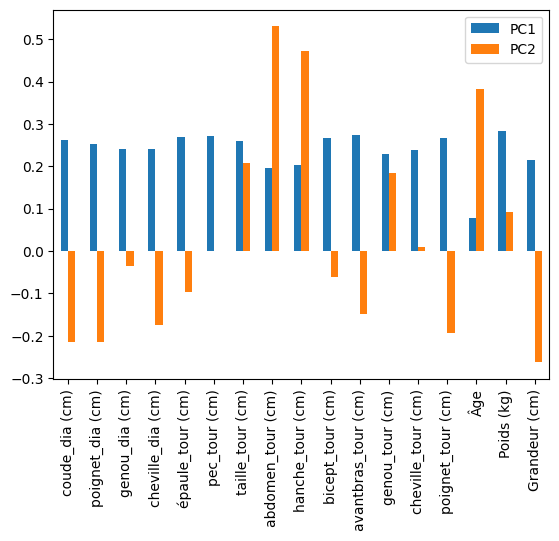

In [18]:

T1=np.dot((Xstand.values-X_pca_mean),P[0,:])
T2=np.dot((Xstand.values-X_pca_mean),P[1,:])
Xest=pca.inverse_transform(T)


TPanda=pd.DataFrame(T)
TPanda.index=X.index
TPanda.columns=['T1','T2']
T_resultats=pd.concat([TPanda,Yclass],axis=1)

PPanda=pd.DataFrame(P.T)
PPanda.index=X.columns
PPanda.columns=['PC1','PC2']

PPanda.plot.bar()


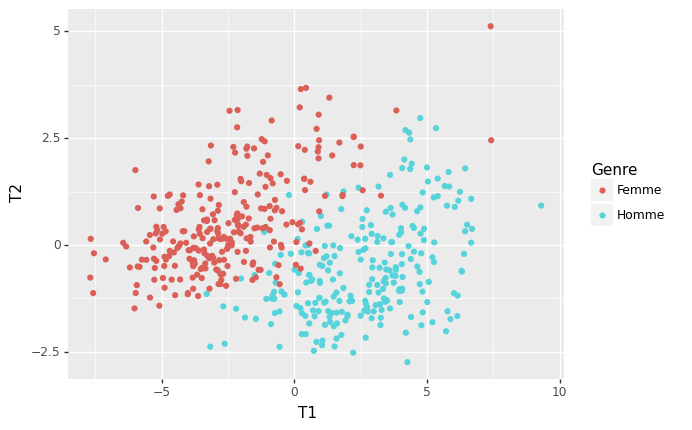

In [19]:

import plotnine as p9
graph = p9.ggplot(data=T_resultats,
           mapping=p9.aes(x='T1', y='T2', color='Genre'))
print(graph + p9.geom_point())
